## Training Clasifier with very low data- IRIS dataset

In [58]:
import matplotlib as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# load data
iris=datasets.load_iris()
# create feature matrix
features=iris.data
# load target of data
target=iris.target

In [5]:
print(type(features))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
target[5:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# create a list of class names
class_names=iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
# Create train and test data
feature_train, feature_test, target_train, target_test=train_test_split(
                                        features,
                                        target,
                                        random_state=0
                            )

In [18]:
# create logistic Regresion
#clasifier=LogisticRegression(max_iter=3000) --> opcional.
# cuando contamos con una variable de respuesta con mas de dos categorias podemos hacer uno de One Versus Rest (ovr)
# tambien es posible hacer uso del de multi_class="multinimomial" especificando el max_iter que es el maximo numero
# de iteraciones para alcanzar la convergencia.
clasifier=LogisticRegression(random_state=0, multi_class="multinomial", max_iter=3000, solver='lbfgs', penalty='l2')

In [19]:
# train model. Nota: cuando se cuenta con una gran cantidad de datos, es una buena idea probar el solver: SAG:
# gradient average descent.
model=clasifier.fit(feature_train, target_train)

In [32]:
model.coef_

array([[-0.41452706,  0.84926829, -2.33262725, -0.98887317],
       [ 0.52086599, -0.29394738, -0.21689938, -0.71377827],
       [-0.10633893, -0.55532091,  2.54952664,  1.70265144]])

In [37]:
model.intercept_

array([  9.24027582,   1.73601369, -10.97628952])

In [65]:
target_predict_proba=model.predict_proba(feature_test)
target_predict_proba

array([[1.16877704e-04, 5.59146481e-02, 9.43968474e-01],
       [1.26316440e-02, 9.60287896e-01, 2.70804598e-02],
       [9.84389313e-01, 1.56106483e-02, 3.88631734e-08],
       [1.25805559e-06, 2.34495220e-02, 9.76549220e-01],
       [9.70275657e-01, 2.97241788e-02, 1.64580290e-07],
       [2.00952957e-06, 5.97959099e-03, 9.94018399e-01],
       [9.81935432e-01, 1.80644967e-02, 7.13506635e-08],
       [2.83378445e-03, 7.47757782e-01, 2.49408434e-01],
       [1.50599636e-03, 7.39140508e-01, 2.59353495e-01],
       [2.04952833e-02, 9.35762015e-01, 4.37427020e-02],
       [9.19502972e-05, 1.60128485e-01, 8.39779564e-01],
       [6.95880582e-03, 8.10287280e-01, 1.82753914e-01],
       [4.06422799e-03, 7.93846594e-01, 2.02089178e-01],
       [3.04895549e-03, 7.60958177e-01, 2.35992868e-01],
       [3.85953628e-03, 7.10458746e-01, 2.85681717e-01],
       [9.82823389e-01, 1.71765542e-02, 5.72337215e-08],
       [6.70027313e-03, 7.56223331e-01, 2.37076396e-01],
       [1.13770502e-02, 8.44676

In [53]:
target_predict=model.predict(feature_test)
type(target_predict)

numpy.ndarray

In [75]:
feature_test[:5]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2]])

In [80]:
probabilidad=1/(1+(1*np.exp(-(9.24027582-0.41452706*6+0.84926829*2.2-2.33262725*4-0.98887317*1))))
print(probabilidad)
print(1-probabilidad)

0.15474255199707446
0.8452574480029256


In [54]:
matrix=confusion_matrix(target_test, target_predict)
matrix

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [23]:
# create dataframe
dataframe=pd.DataFrame(matrix, index=class_names, columns=class_names)

<AxesSubplot:>

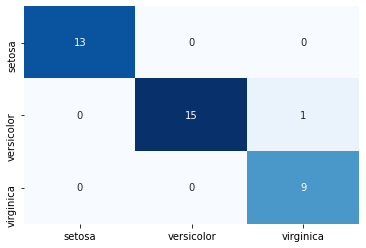

In [25]:
# create headmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")

In [26]:
accuracy_model=model.score(feature_test, target_test)
print(f"Acucuracy of model: {accuracy_model}")

Acucuracy of model: 0.9736842105263158


In [29]:
print(f'de los {len(feature_test)} registros utilizados como test, fueron correctamente clasificados 37')

de los 38 registros utilizados como test, fueron correctamente clasificados 37
